In [30]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Input
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


In [32]:
# Load the dataset
data = pd.read_csv('./processed_text.csv')

# Check for NaN and infinite values
print(data.isnull().sum())  # Check for missing values
data.replace([np.inf, -np.inf], np.nan, inplace=True)  # Replace infinities if any
data.dropna(inplace=True)  # Drop any rows with NaN values

# Normalize the sentiment scores
scaler = MinMaxScaler(feature_range=(0, 1))
data['sentiment_scaled'] = scaler.fit_transform(data[['sentiment']])

# Prepare features and targets
features = data[['sentiment_scaled', 'sentiment_class']].values
target = data['sentiment_scaled'].values

# Reshape features for LSTM input
X = np.reshape(features, (features.shape[0], 1, features.shape[1]))
y = target


Unnamed: 0            0
body                  2
sentiment          7478
sentiment_class       0
clean_text          794
dtype: int64


In [34]:
model = Sequential()
model.add(Input(shape=(1, 2)))  # Assuming '1' time step and '2' features
model.add(LSTM(units=30, return_sequences=True, kernel_initializer='glorot_uniform'))
model.add(Dropout(0.2))
model.add(LSTM(units=30, kernel_initializer='glorot_uniform'))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Checkpoint to save the best model
checkpoint = ModelCheckpoint('lstm_model.keras', monitor='loss', verbose=1, save_best_only=True, mode='min')
model.fit(X, y, epochs=50, batch_size=32, callbacks=[checkpoint])


Epoch 1/50
1407/1480 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step - loss: 0.0647
Epoch 1: loss improved from inf to 0.01936, saving model to lstm_model.keras
1480/1480 ━━━━━━━━━━━━━━━━━━━━ 1s 397us/step - loss: 0.0624
Epoch 2/50
1446/1480 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step - loss: 0.0036
Epoch 2: loss improved from 0.01936 to 0.00309, saving model to lstm_model.keras
1480/1480 ━━━━━━━━━━━━━━━━━━━━ 1s 387us/step - loss: 0.0036
Epoch 3/50
1447/1480 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step - loss: 0.0021
Epoch 3: loss improved from 0.00309 to 0.00185, saving model to lstm_model.keras
1480/1480 ━━━━━━━━━━━━━━━━━━━━ 1s 387us/step - loss: 0.0021
Epoch 4/50
1406/1480 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step - loss: 0.0013
Epoch 4: loss improved from 0.00185 to 0.00118, saving model to lstm_model.keras
1480/1480 ━━━━━━━━━━━━━━━━━━━━ 1s 397us/step - loss: 0.0013
Epoch 5/50
1447/1480 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step - loss: 9.4875e-04
Epoch 5: loss improved from 0.00118 to 0.00092, saving model to lstm_model.keras


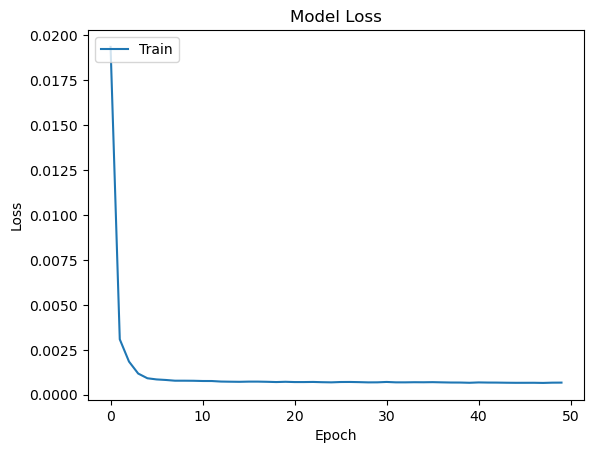

In [36]:
# Plot training loss
plt.plot(model.history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

# Save the final model
model.save('final_lstm_model.keras')

